In [2]:
import pandas as pd

In [3]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

C:\Users\rutva


In [4]:
df = pd.read_excel('Database for OAA.xlsx',sheet_name='Age')

In [5]:
df

,Headcount Full-Time Fall,Age,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
0,Algonquin College,0 - 17,360,362,309,359,334,353,368,345,292,336.0
1,Algonquin College,18 - 19,5061,5350,5329,5196,5090,5229,5211,5257,4427,4385.0
2,Algonquin College,20 - 24,7149,7346,7442,7787,7625,7825,8229,8214,7378,6361.0
3,Algonquin College,25 - 29,1919,2064,2153,2282,2323,2595,2824,3027,2915,2644.0
4,Algonquin College,30 - 34,630,716,742,742,854,995,1095,1178,1254,1282.0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,St. Lawrence College,40 - 44,113,104,90,80,92,105,124,139,106,124.0
260,St. Lawrence College,45 - 49,66,74,60,60,57,72,71,71,64,65.0
261,St. Lawrence College,50 - 54,42,34,32,31,35,49,59,48,37,30.0
262,St. Lawrence College,55 - 59,10,21,15,14,,13,17,17,26,19.0


In [6]:
print(df.columns)

Index(['Headcount Full-Time Fall', 'Age', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
       '2019-2020', '2020-2021', '2021-2022'],
      dtype='object')


C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\401177626.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['Headcount Full-Time Fall', 'Age']).sum().unstack()


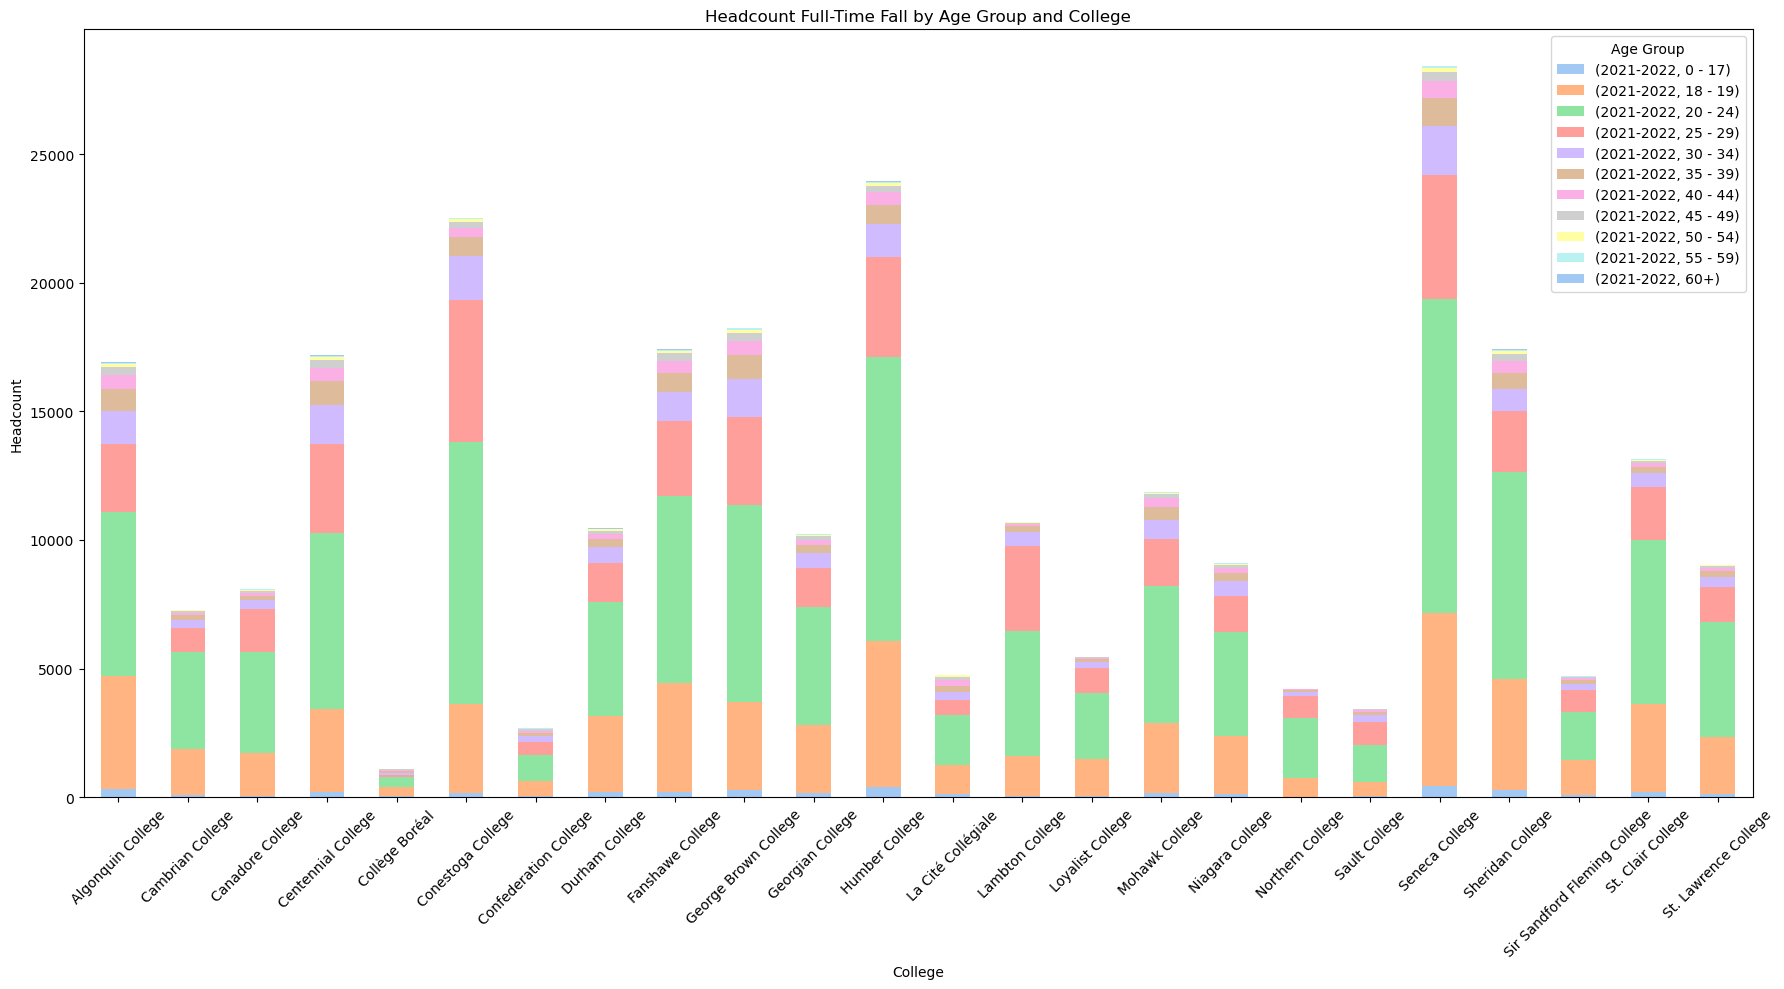

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Database for OAA.xlsx',sheet_name='Age')

# Grouping data by college name and age group
grouped_data = df.groupby(['Headcount Full-Time Fall', 'Age']).sum().unstack()

# Setting a custom color palette
colors = sns.color_palette('pastel')  # You can choose any Seaborn color palette

# Plotting the data with the custom color palette
grouped_data.plot(kind='bar', stacked=True, figsize=(18, 10), color=colors)
plt.title('Headcount Full-Time Fall by Age Group and College')
plt.xlabel('College')
plt.ylabel('Headcount')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\2847477104.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_counts = df.groupby('Gender').sum()


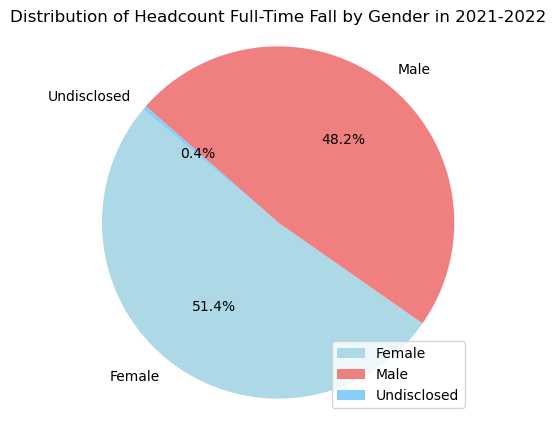

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from Excel file
df = pd.read_excel('Database for OAA.xlsx',sheet_name='Gender')

# Grouping data by gender and summing up the headcount
gender_counts = df.groupby('Gender').sum()

# Define custom colors
colors = ['lightblue', 'lightcoral', 'lightskyblue']

# Plotting the pie chart with custom colors
plt.figure(figsize=(5, 5))
plt.pie(gender_counts['2021-2022'], labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Headcount Full-Time Fall by Gender in 2021-2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(gender_counts.index, loc='lower right')
plt.show()


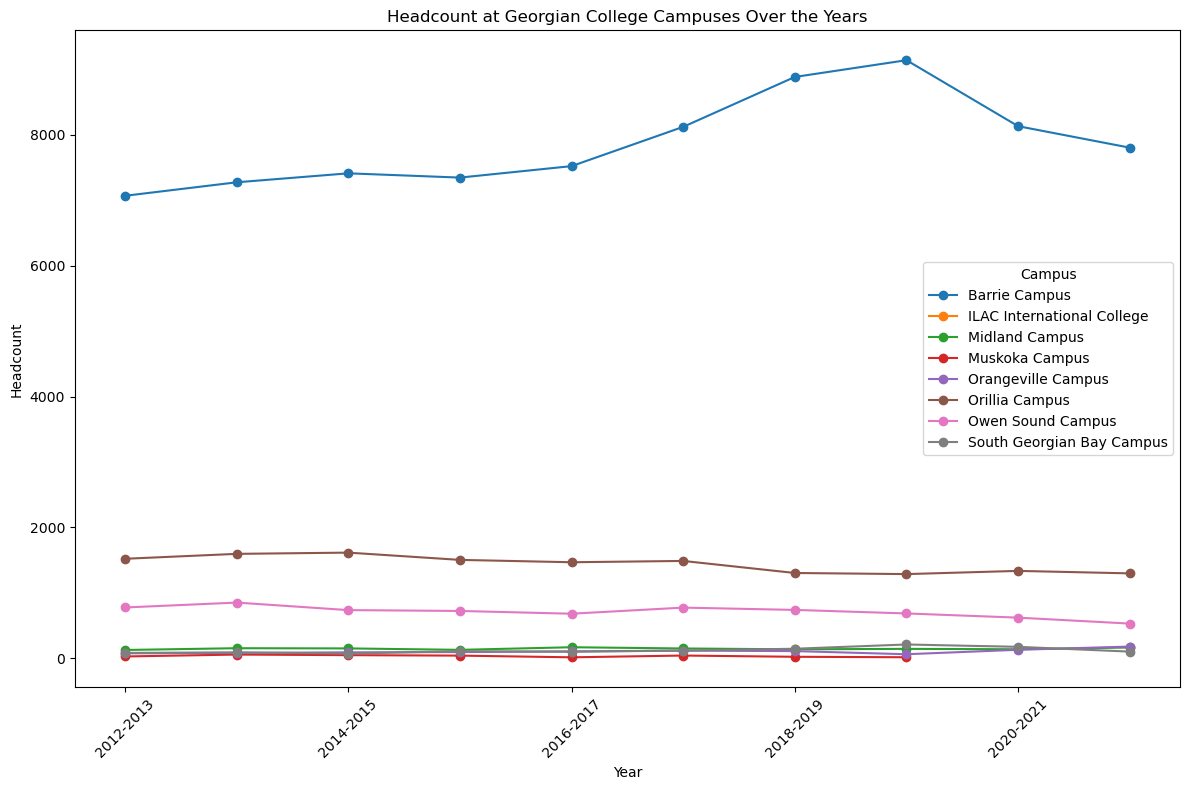

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in an Excel file named 'Database for OAA.xlsx' in a sheet named 'Headcount'
df = pd.read_excel('Database for OAA.xlsx', sheet_name='Campus')

# Filter the data for Algonquin College
college_data = df[df['Headcount Full-Time Fall'] == 'Georgian College']

# Pivot the data to have years as columns and campuses as rows
pivot_data = college_data.set_index('Campus').drop(columns='Headcount Full-Time Fall').transpose()

# Plotting the line chart
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='line', ax=plt.gca(), marker='o')  # Line chart with markers at data points
plt.title('Headcount at Georgian College Campuses Over the Years')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.xticks(rotation=45)
plt.legend(title='Campus')
plt.tight_layout()
plt.show()


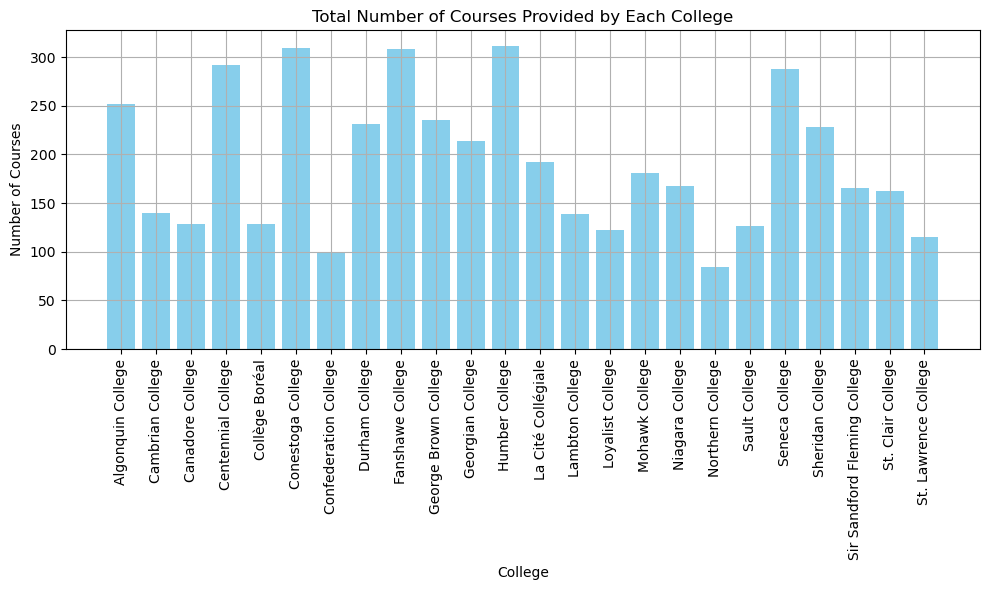

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Database for OAA.xlsx', sheet_name='Program')

college_course_counts = df.groupby('Headcount Full-Time Fall')['Program'].nunique().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(college_course_counts['Headcount Full-Time Fall'], college_course_counts['Program'], color='skyblue')

plt.xlabel('College')
plt.ylabel('Number of Courses')
plt.title('Total Number of Courses Provided by Each College')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('Database for OAA.xlsx', sheet_name='CIP')

# Group by 'Instructional Program Class En Title' and sum the 'Headcount Full-Time Fall'
program_counts = df.groupby('Instructional Program Class En Title')['Headcount Full-Time Fall'].sum()

# Sort the programs by headcount in descending order and select the top 5
top_programs = program_counts.sort_values(ascending=False).head(5)

# Extract data for the top 5 programs
top_program_data = df[df['Instructional Program Class En Title'].isin(top_programs.index)]

# Print the extracted data
print(top_program_data)

               College Name Instructional Program Class Code  \
15        Algonquin College                          52.0101   
80        Algonquin College                          19.0709   
82        Algonquin College                          43.0107   
83        Algonquin College                          52.0201   
84        Algonquin College                               NC   
...                     ...                              ...   
17156     St. Clair College                               NC   
17174  St. Lawrence College                          19.0709   
17183  St. Lawrence College                          43.0107   
17210  St. Lawrence College                          52.0101   
17211  St. Lawrence College                          52.0201   

                  Instructional Program Class En Title  \
15                          Business/commerce, general   
80                       Child care provider/assistant   
82                     Criminal justice/police science   

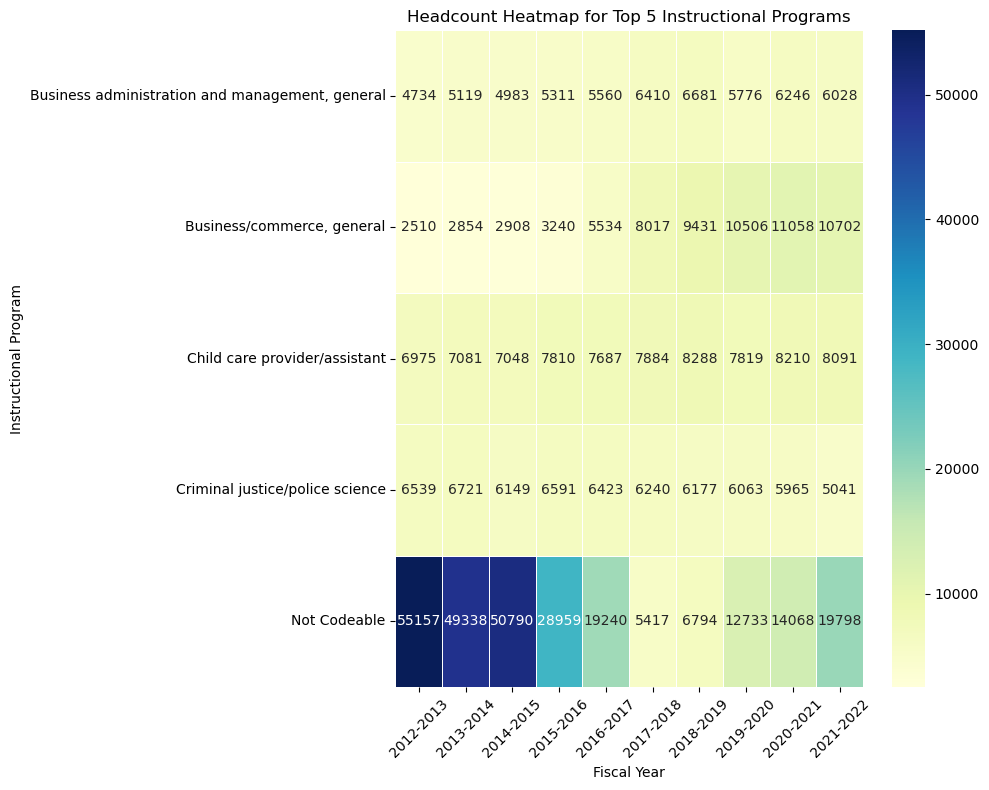

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel('Database for OAA.xlsx', sheet_name='CIP')

# Group by 'Instructional Program Class En Title' and sum the 'Headcount Full-Time Fall'
program_counts = df.groupby('Instructional Program Class En Title')['Headcount Full-Time Fall'].sum()

# Sort the programs by headcount in descending order and select the top 5
top_programs = program_counts.sort_values(ascending=False).head(5)

# Extract data for the top 5 programs
top_program_data = df[df['Instructional Program Class En Title'].isin(top_programs.index)]

# Pivot the data
pivot_df = top_program_data.pivot_table(index='Instructional Program Class En Title', 
                                        columns='Fiscal Year', 
                                        values='Headcount Full-Time Fall', 
                                        aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Headcount Heatmap for Top 5 Instructional Programs')
plt.xlabel('Fiscal Year')
plt.ylabel('Instructional Program')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


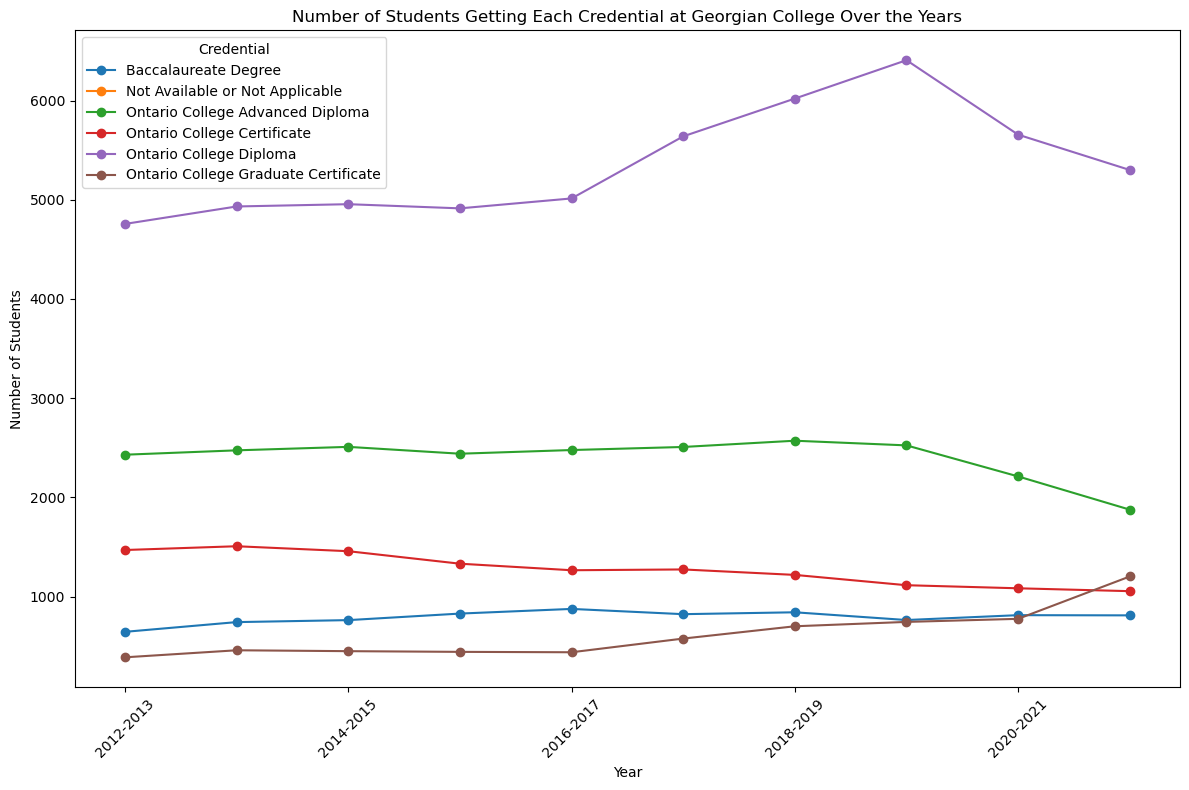

In [14]:
df = pd.read_excel('Database for OAA.xlsx', sheet_name='Credentials')

# Filter the data for Georgian College
college_data = df[df['Headcount Full-Time Fall'] == 'Georgian College']

# Drop the unnecessary 'Algonquin College' column
college_data = college_data.drop(columns='Headcount Full-Time Fall')

# Transpose the data to have years as columns and credentials as rows
pivot_data = college_data.set_index('Credentials').transpose()

# Plotting the line chart
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='line', ax=plt.gca(), marker='o')  # Line chart with markers at data points
plt.title('Number of Students Getting Each Credential at Georgian College Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Credential')
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Age'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Age

Average Headcount:
                                 2012-2013    2013-2014    2014-2015  \
Headcount Full-Time Fall                                              
Algonquin College             1460.727273  1531.272727  1547.727273   
Cambrian College               516.777778   558.111111   508.900000   
Canadore College               282.444444   260.200000   294.666667   
Centennial College            1210.545455  1259.909091  1299.363636   
Collège Boréal                 172.666667   188.750000   164.555556   
Conestoga College             1045.300000  1079.700000  1099.900000   
Confederation College          322.300000   324.200000   374.444444   
Durham College                 881.900000   963.600000   988.300000   
Fanshawe College              1422.400000  1464.700000  1446.700000   
George Brown College          1568.454545  1706.363636  1808.272727   
Georgian College               968.100000  1010.900000  1012.400000   
Humber College                21

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\1797062631.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [31]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Campus'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Campus

Average Headcount:
                                 2012-2013    2013-2014    2014-2015  \
Headcount Full-Time Fall                                              
Algonquin College             5356.000000  5614.666667  5675.000000   
Cambrian College              1550.666667  2516.000000  2542.500000   
Canadore College               364.571429   433.666667   439.166667   
Centennial College            2663.200000  2771.800000  2858.600000   
Collège Boréal                 195.500000   218.571429   186.500000   
Conestoga College             1743.500000  1801.000000  1834.000000   
Confederation College         1075.333333   811.000000   676.600000   
Durham College                2939.666667  3213.333333  3296.000000   
Fanshawe College              3557.000000  3662.250000  3617.500000   
George Brown College          2875.500000  3128.333333  3315.166667   
Georgian College              1383.857143  1444.857143  1447.571429   
Humber College               

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\486914477.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [32]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Credentials'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Credentials

Average Headcount:
                               2012-2013  2013-2014  2014-2015  2015-2016  \
Headcount Full-Time Fall                                                   
Algonquin College               3213.60    3368.80    3405.00    3487.00   
Cambrian College                 931.80    1006.40    1018.20    1112.40   
Canadore College                 638.00     651.25     666.25     683.75   
Centennial College              2663.20    2771.80    2858.60    2991.00   
Collège Boréal                   388.75     306.00     298.40     290.60   
Conestoga College               2092.20    2161.20    2200.80    2298.40   
Confederation College            806.50     811.00     845.75     849.75   
Durham College                  2204.75    2410.00    2472.00    2500.75   
Fanshawe College                2845.60    2929.80    2894.00    2936.20   
George Brown College            3450.60    3754.00    3978.20    4087.00   
Georgian College                193

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\973090024.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [33]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Gender'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Gender

Average Headcount:
                                 2012-2013    2013-2014    2014-2015  \
Headcount Full-Time Fall                                              
Algonquin College             5356.000000  5614.666667  5675.000000   
Cambrian College              2329.000000  1677.333333  2542.500000   
Canadore College              1275.500000  1300.500000  1332.500000   
Centennial College            4438.666667  6927.000000  7145.000000   
Collège Boréal                 782.000000   765.000000   746.000000   
Conestoga College             5230.500000  5403.000000  5502.000000   
Confederation College         1612.500000  1622.000000  1691.500000   
Durham College                2939.666667  4818.500000  4944.000000   
Fanshawe College              7114.000000  7324.500000  7235.000000   
George Brown College          5751.000000  9385.000000  9945.500000   
Georgian College              4843.500000  5057.000000  5066.500000   
Humber College               

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\1516416029.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [34]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Study Level'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Study Level

Average Headcount:
                               Study Level    2012-2013    2013-2014  \
Headcount Full-Time Fall                                              
Algonquin College                     2.5  4017.000000  4211.000000   
Cambrian College                      2.5  1164.750000  1258.000000   
Canadore College                      2.0   850.666667   868.333333   
Centennial College                    2.5  3329.000000  3464.750000   
Collège Boréal                        2.0   521.333333   510.000000   
Conestoga College                     2.5  2615.250000  2701.500000   
Confederation College                 2.0  1075.333333  1081.333333   
Durham College                        2.5  2939.666667  3213.333333   
Fanshawe College                      2.5  3557.000000  3662.250000   
George Brown College                  2.5  5751.000000  4692.500000   
Georgian College                      2.5  2421.750000  2528.500000   
Humber College          

In [35]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Tongue'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Tongue

Average Headcount:
                                 2012-2013    2013-2014    2014-2015  \
Headcount Full-Time Fall                                              
Algonquin College             5356.000000  5614.666667  5675.000000   
Cambrian College              1553.000000  5032.000000  1697.000000   
Canadore College               850.666667   868.333333   888.333333   
Centennial College            4438.666667  4619.666667  4764.333333   
Collège Boréal                 521.333333   510.000000   497.333333   
Conestoga College             3487.000000  3602.000000  3668.000000   
Confederation College         1075.333333  1081.333333  1127.666667   
Durham College                2939.666667  3213.333333  3296.000000   
Fanshawe College              4742.666667  4883.000000  4823.333333   
George Brown College          5751.000000  6256.666667  6630.333333   
Georgian College              3229.000000  3371.333333  3377.666667   
Humber College               

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\1056392398.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [36]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Program'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Program

Average Headcount:
                                2012-2013   2013-2014   2014-2015   2015-2016  \
Headcount Full-Time Fall                                                       
Algonquin College             131.418033  132.472441  131.751938  129.940299   
Cambrian College               71.400000   81.639344   75.373134   80.347826   
Canadore College               48.862745   54.851064   54.979167   54.795918   
Centennial College            107.104839  106.515385  108.862595  110.711111   
Collège Boréal                 37.025000   34.714286   35.700000   35.052632   
Conestoga College              84.764228   84.685039   81.873134   83.635036   
Confederation College          56.105263   57.482143   59.964286   59.298246   
Durham College                 83.952381   85.821429   87.159292   86.834783   
Fanshawe College              123.486957  118.878049  123.068376  111.816794   
George Brown College          161.000000  163.095652  165.550000  160.8

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\304061065.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [37]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Status'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Status

Average Headcount:
                                 2012-2013    2013-2014    2014-2015  \
Headcount Full-Time Fall                                              
Algonquin College             2008.500000  2105.500000  2128.125000   
Cambrian College              1164.750000  1257.250000  1272.250000   
Canadore College               510.200000   520.400000   532.400000   
Centennial College            2218.166667  2308.833333  2381.500000   
Collège Boréal                 312.600000   305.600000   297.400000   
Conestoga College             2091.000000  2160.600000  2749.250000   
Confederation College          806.000000   810.250000   844.500000   
Durham College                2203.000000  2407.750000  1977.200000   
Fanshawe College              2371.333333  2927.800000  2411.500000   
George Brown College          2463.142857  2678.714286  2839.000000   
Georgian College              2419.500000  2021.800000  2025.400000   
Humber College               

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\193524899.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [38]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Country'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# 1. Average headcount for each college across the years
avg_headcount = df.groupby("Headcount Full-Time Fall").mean()
print("Average Headcount:\n", avg_headcount)


Insights for sheet: Country

Average Headcount:
                                 2012-2013    2013-2014    2014-2015  \
Headcount Full-Time Fall                                              
Algonquin College              258.508197   250.727273   261.281250   
Cambrian College               770.833333  1231.750000   831.166667   
Canadore College               832.000000   834.333333   517.800000   
Centennial College             302.023256   261.307692   309.844444   
Collège Boréal                 212.142857   147.500000   176.375000   
Conestoga College              217.893617   220.291667   224.458333   
Confederation College          626.600000  1047.333333   652.400000   
Durham College                 476.611111   520.888889   438.500000   
Fanshawe College               349.425000   300.312500   302.085106   
George Brown College           265.093750   246.546667   227.546512   
Georgian College               591.625000   449.636364   449.227273   
Humber College              

C:\Users\rutva\AppData\Local\Temp\ipykernel_18480\1729819884.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_headcount = df.groupby("Headcount Full-Time Fall").mean()


In [53]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Age'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# Group by "Headcount Full-Time Fall" and "Age", and then find maximum and minimum headcount
grouped = df.groupby(["Headcount Full-Time Fall", "Age"])

# Create a pivot table for maximum and minimum headcount together
headcount_table = pd.pivot_table(grouped.agg(['max', 'min']), 
                                  index='Headcount Full-Time Fall', 
                                  columns='Age', 
                                  values=df.columns[2:])

# Display the combined table
print("Maximum and Minimum Headcount:")
print(headcount_table)


Insights for sheet: Age

Maximum and Minimum Headcount:
                             2012-2013                                   \
                                   max                                    
Age                             0 - 17 18 - 19  20 - 24 25 - 29 30 - 34   
Headcount Full-Time Fall                                                  
Algonquin College                360.0  5061.0   7149.0  1919.0   630.0   
Cambrian College                  75.0  1298.0   2233.0   613.0   197.0   
Canadore College                  46.0   767.0   1149.0   250.0   130.0   
Centennial College               180.0  2575.0   6103.0  2139.0   789.0   
Collège Boréal                    48.0   667.0    510.0   113.0    70.0   
Conestoga College                121.0  2956.0   5022.0  1220.0   454.0   
Confederation College             57.0   929.0   1312.0   459.0   190.0   
Durham College                   196.0  2887.0   4290.0   806.0   241.0   
Fanshawe College                 218.0  4628

In [56]:
import pandas as pd

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Credentials'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Insights
print(f"Insights for sheet: {sheet_name}\n")

# Group by "Headcount Full-Time Fall" and "Age", and then find maximum and minimum headcount
grouped = df.groupby(["Headcount Full-Time Fall", "Credentials"])

# Create a pivot table for maximum and minimum headcount together
headcount_table = pd.pivot_table(grouped.agg(['max', 'min']), 
                                  index='Headcount Full-Time Fall', 
                                  columns='Credentials', 
                                  values=df.columns[2:])

# Display the combined table
print("Maximum and Minimum Headcount:")
print(headcount_table)


Insights for sheet: Credentials

Maximum and Minimum Headcount:
                                        2012-2013  \
                                              max   
Credentials                  Baccalaureate Degree   
Headcount Full-Time Fall                            
Algonquin College                           381.0   
Cambrian College                            321.0   
Canadore College                              NaN   
Centennial College                          425.0   
Collège Boréal                               19.0   
Conestoga College                          1386.0   
Confederation College                         NaN   
Durham College                                NaN   
Fanshawe College                            418.0   
George Brown College                       1210.0   
Georgian College                            644.0   
Humber College                             3808.0   
La Cité Collégiale                           76.0   
Lambton College                    

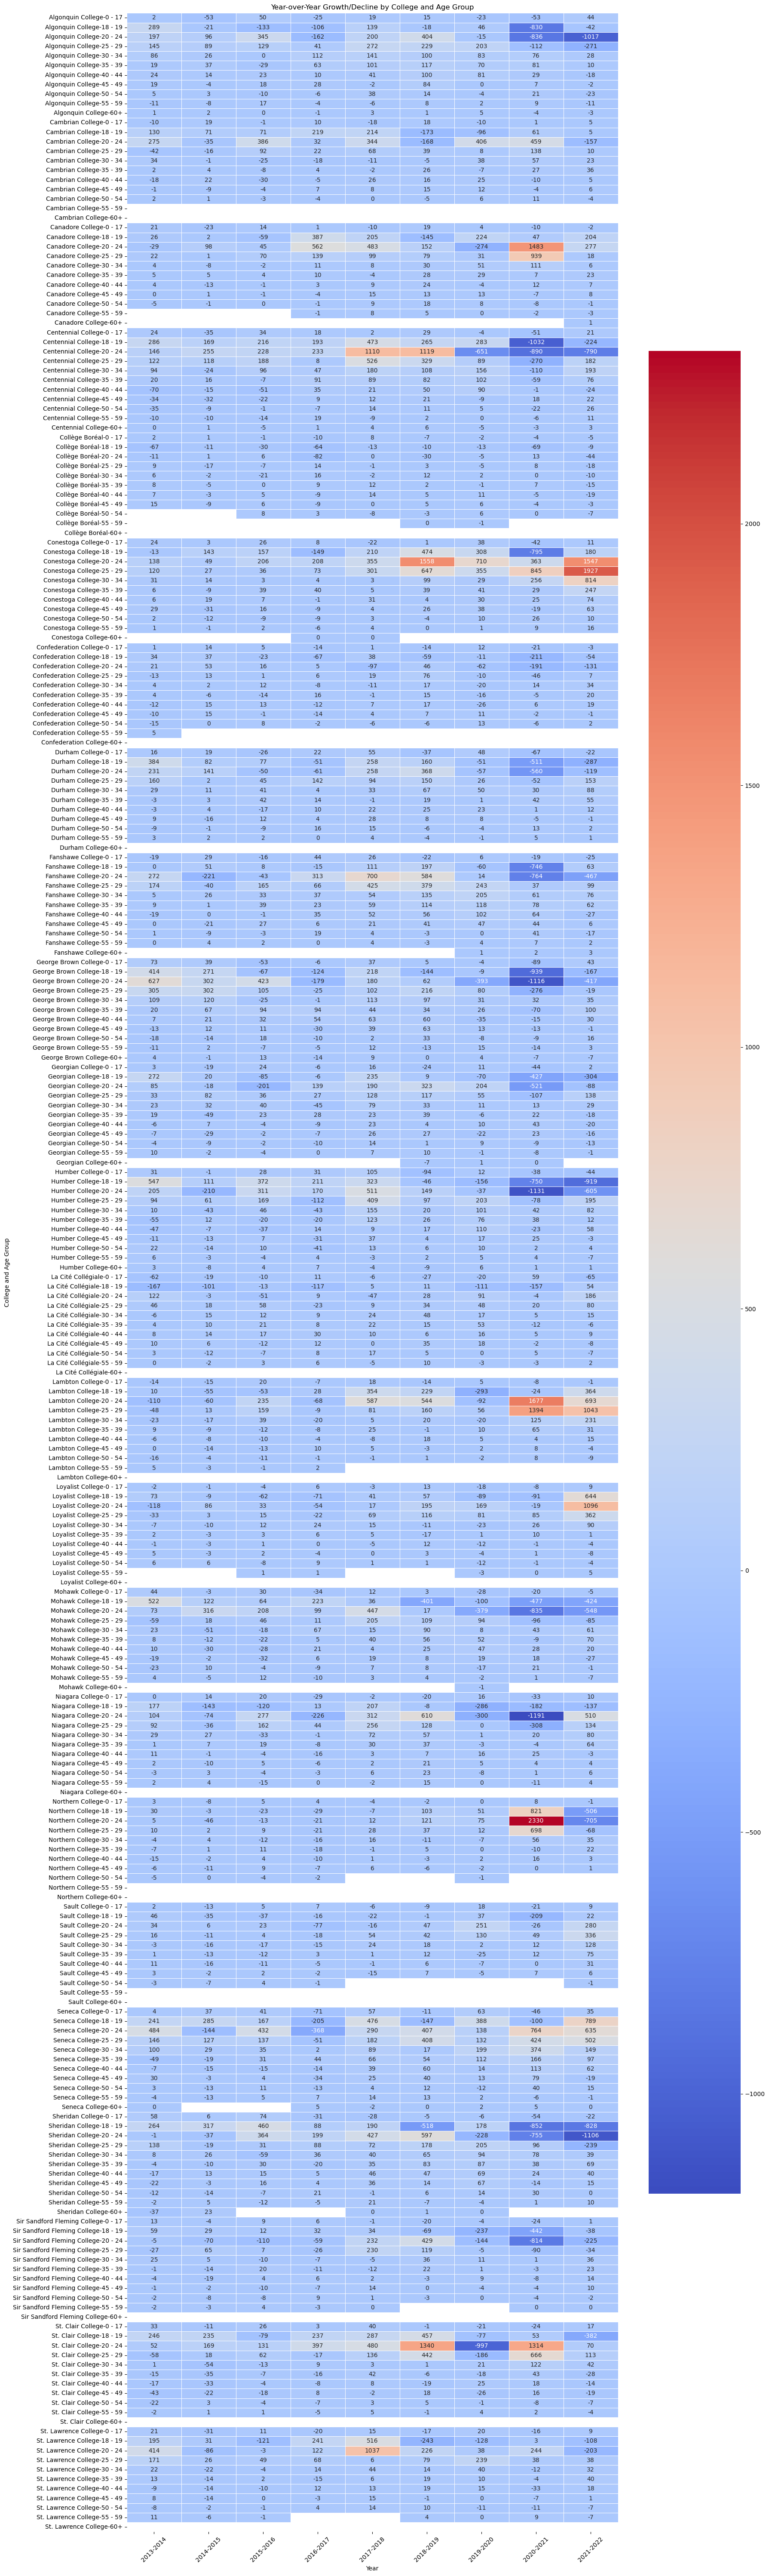

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
xls = pd.ExcelFile('Database for OAA.xlsx')

# Read the specific sheet into a DataFrame
sheet_name = 'Age'  # Specify the sheet name you want to analyze
df = pd.read_excel(xls, sheet_name)

# Convert all columns except the first two to float
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate year-over-year growth/decline
headcount_growth = df.set_index(["Headcount Full-Time Fall", "Age"]).diff(axis=1).iloc[:, 1:]

# Plotting
plt.figure(figsize=(18, 60))
sns.heatmap(headcount_growth, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title("Year-over-Year Growth/Decline by College and Age Group")
plt.xlabel("Year")
plt.ylabel("College and Age Group")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'Database for OAA.xlsx'
sheet_name = 'CIP'

# Read the specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# computing summary statistics
print(df.describe())

       Headcount Full-Time Fall
count              16337.000000
mean                 152.998653
std                  299.276382
min                   10.000000
25%                   42.000000
50%                   82.000000
75%                  169.000000
max                 9888.000000


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'Database for OAA.xlsx'
sheet_name = 'Study Level'

# Read the specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# computing summary statistics
print(df.describe())

       Study Level     2012-2013     2013-2014     2014-2015     2015-2016  \
count    91.000000     87.000000     88.000000     88.000000     88.000000   
mean      2.417582   2492.885057   2569.681818   2599.465909   2670.079545   
std       1.096114   2941.544273   3004.795667   3015.183656   3122.579674   
min       1.000000     15.000000     12.000000     12.000000      8.000000   
25%       1.000000    305.000000    356.750000    404.000000    375.000000   
50%       2.000000   1205.000000   1260.000000   1278.500000   1344.000000   
75%       3.000000   3401.500000   3692.250000   3760.500000   3734.750000   
max       4.000000  12076.000000  12407.000000  11725.000000  12511.000000   

          2016-2017     2017-2018     2018-2019     2019-2020     2020-2021  \
count     88.000000     87.000000     88.000000     88.000000     88.000000   
mean    2703.340909   2956.977011   3106.977273   3141.738636   3108.125000   
std     3132.130838   3409.987076   3573.059937   3601.65860

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'Database for OAA.xlsx'
sheet_name = 'Age'

# Read the specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# computing summary statistics
print(df.describe())

          2012-2013     2013-2014     2014-2015     2015-2016     2016-2017  \
count    241.000000    240.000000    240.000000    242.000000    243.000000   
mean     899.502075    941.762500    952.683333    970.566116    978.604938   
std     1756.548716   1833.551865   1853.832780   1905.786630   1913.092683   
min       10.000000     10.000000     10.000000     10.000000     10.000000   
25%       65.000000     62.500000     59.000000     55.250000     54.000000   
50%      187.000000    192.000000    189.500000    193.000000    195.000000   
75%      752.000000    803.750000    806.000000    740.500000    867.500000   
max    11654.000000  11859.000000  11649.000000  11960.000000  12130.000000   

          2017-2018     2018-2019     2019-2020     2020-2021     2021-2022  
count    241.000000    244.000000    246.000000    244.000000    245.000000  
mean    1066.946058   1120.127049   1123.520325   1120.553279   1136.040816  
std     2032.147032   2120.188994   2097.736990   1992

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'Database for OAA.xlsx'
sheet_name = 'Campus'

# Read the specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# computing summary statistics
print(df.describe())

          2012-2013     2013-2014     2014-2015     2015-2016     2016-2017  \
count     96.000000     96.000000    100.000000    103.000000    110.000000   
mean    2259.104167   2355.395833   2287.070000   2280.932039   2162.372727   
std     3350.670753   3484.167881   3480.017895   3533.516937   3476.849892   
min       11.000000     15.000000     11.000000     17.000000     11.000000   
25%       89.250000     93.000000     91.750000    102.500000     96.500000   
50%      758.000000    745.000000    621.000000    549.000000    538.000000   
75%     3117.500000   3229.750000   3110.750000   3073.500000   2858.500000   
max    15122.000000  15837.000000  16012.000000  16390.000000  16384.000000   

          2017-2018     2018-2019     2019-2020     2020-2021     2021-2022  
count    110.000000    114.000000    113.000000    116.000000    124.000000  
mean    2338.418182   2398.263158   2446.548673   2357.706897   2245.290323  
std     3712.117703   3896.787715   3939.383083   3607

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'Database for OAA.xlsx'
sheet_name = 'Credentials'

# Read the specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# computing summary statistics
print(df.describe())

          2012-2013     2013-2014     2014-2015     2015-2016     2016-2017  \
count    114.000000    116.000000    116.000000    116.000000    116.000000   
mean    1902.307018   1949.413793   1972.008621   2025.577586   2050.810345   
std     2259.384849   2311.633682   2334.756922   2385.707661   2382.222338   
min       19.000000     11.000000     14.000000     11.000000     12.000000   
25%      382.500000    391.500000    396.250000    429.750000    424.250000   
50%     1164.500000   1128.000000   1113.500000   1098.500000   1121.000000   
75%     2340.000000   2499.000000   2593.500000   2628.750000   2619.250000   
max    10747.000000  11156.000000  11144.000000  11220.000000  10985.000000   

          2017-2018     2018-2019     2019-2020     2020-2021     2021-2022  
count    114.000000    116.000000    116.000000    125.000000    127.000000  
mean    2256.578947   2357.017241   2383.387931   2188.120000   2192.314961  
std     2551.719285   2660.293897   2733.073119   2527

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel file
file_path = 'Database for OAA.xlsx'
sheet_name = 'Gender'

# Read the specific sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# computing summary statistics
print(df.describe())

          2012-2013     2013-2014     2014-2015     2015-2016     2016-2017  \
count     58.000000     56.000000     53.000000     51.000000     55.000000   
mean    3738.982759   4037.750000   4315.735849   4607.117647   4325.072727   
std     3317.955540   3464.979146   3489.554463   3579.379374   3657.106729   
min       10.000000     14.000000     21.000000     47.000000     10.000000   
25%     1162.750000   1205.750000   1514.000000   1567.500000   1339.500000   
50%     2629.000000   2918.000000   3749.000000   3890.000000   3241.000000   
75%     6177.250000   6663.250000   7083.000000   7299.500000   7389.500000   
max    11552.000000  12160.000000  12504.000000  12904.000000  12936.000000   

          2017-2018     2018-2019     2019-2020     2020-2021     2021-2022  
count     55.000000     54.000000     58.000000     59.000000     63.000000  
mean    4675.345455   5057.981481   4764.189655   4630.423729   4414.317460  
std     3885.864098   4027.879476   4169.274532   3926